## Arima Exercise

In [292]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [293]:
# load data
original = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv',
                 parse_dates = ['Month'], 
                 index_col = ['Month']).rename(columns={'#Passengers':'Passengers'})

In [328]:
airpass = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv')
airpass.rename(columns={'#Passengers':'Passengers'},inplace=True)

In [331]:
airpassind = airpass.set_index('Month',inplace=False)

**Task:** Print the top 5 rows.

In [294]:
original.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Task:** Create the function called `plot_timeseries(df)`.

In [295]:
def plot_timeseries(timeseries_list, labels_list):
    colors = [ 'blue','red', 'black', 'Green', 'Pink']
    zip_list = list(zip(timeseries_list,labels_list))
    for i in zip_list:
        columns = i[0].columns.tolist()
        color = colors[0]
        plt.plot(i[0], color=color, label=i[1])
        colors.remove(color)
    plt.legend(loc='best')
    return plt.show()

**Task:** Plot the time series from above.

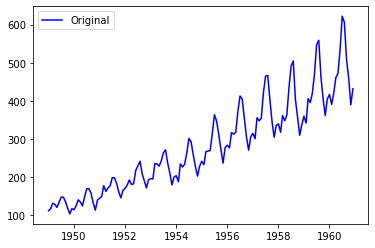

In [296]:
plot_timeseries([original], ['Original'])

**Task:** Compute the rolling mean and the rolling std with an appropriate window size.

In [297]:
rolling_mean = original.rolling(12).mean()

In [298]:
rolling_std = original.rolling(21).std()

**Task:** Plot the two time series:
- with rolling mean 
- with rolling std

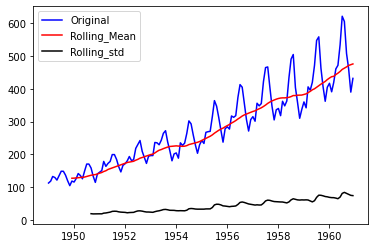

In [299]:
plot_timeseries([original, rolling_mean, rolling_std], ['Original', 'Rolling_Mean', 'Rolling_std'])

**Task:** Test the stationarity of all the time series

In [300]:
from statsmodels.tsa.stattools import adfuller

def ADF_Stationarity_Test(timeseries):
    X = timeseries
    X = X.dropna()
    result = adfuller(X)

    print('--ADF Test Result--')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
	    print('\t%s: %.3f' % (key, value))
    print()
    
    if result[1] <= 0.05:
        print(f'With a p-value of {result[1]} and a significance level of 0.05, the time series is stationary')
    else:
        print(f'With a p-value of {result[1]} and a significance level of 0.05, the time series is non-stationary')

In [301]:
ADF_Stationarity_Test(original)

--ADF Test Result--
ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579

With a p-value of 0.991880243437641 and a significance level of 0.05, the time series is non-stationary


In [302]:
ADF_Stationarity_Test(rolling_mean)

--ADF Test Result--
ADF Statistic: 0.873695
p-value: 0.992737
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579

With a p-value of 0.9927372598211598 and a significance level of 0.05, the time series is non-stationary


In [303]:
ADF_Stationarity_Test(rolling_std)

--ADF Test Result--
ADF Statistic: 1.798766
p-value: 0.998347
Critical Values:
	1%: -3.491
	5%: -2.888
	10%: -2.581

With a p-value of 0.9983465671616736 and a significance level of 0.05, the time series is non-stationary


**Task:** Perform a log transformation on the original time series. 

In [304]:
passengers_log = np.log(original)

**Task:** Plot the transformed time series.

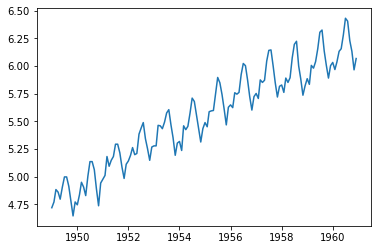

In [305]:
plt.plot(passengers_log)

**Task:** Test the stationarity of the transformed time series. If it isn't stationary, try a different transformation technique. 

In [306]:
ADF_Stationarity_Test(passengers_log)

--ADF Test Result--
ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579

With a p-value of 0.422366774770388 and a significance level of 0.05, the time series is non-stationary


In [307]:
rolling_mean_log = passengers_log.rolling(window=12).mean()
rolling_std_log = passengers_log.rolling(window=12).std()

In [308]:
passengers_diff = passengers_log - rolling_mean_log
passengers_diff.dropna(inplace=True)
passengers_diff.head()

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [309]:
ADF_Stationarity_Test(passengers_diff)

--ADF Test Result--
ADF Statistic: -3.162908
p-value: 0.022235
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580

With a p-value of 0.022234630001242487 and a significance level of 0.05, the time series is stationary


**Task:** Use the stationary time series and find the optimal `(p, d, q)` parameters of ARIMA model.

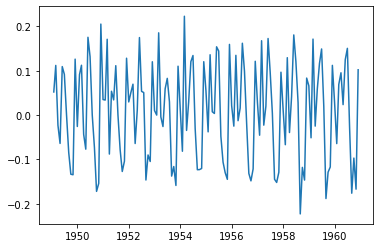

In [310]:
passengers_log_diff = passengers_log - passengers_log.shift()
passengers_log_diff.dropna(inplace=True)
plt.plot(passengers_log_diff)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

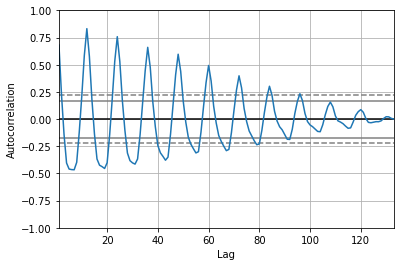

In [311]:
from pandas.plotting import autocorrelation_plot
 
autocorrelation_plot(passengers_diff)

Plotting ARIMA model


/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


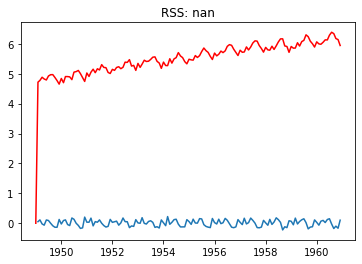

In [312]:
model = ARIMA(passengers_log, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(passengers_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - passengers_log_diff['Passengers'])**2))
print('Plotting ARIMA model')

**Task:** Plot the predictions (not transformed to the original scale).

In [313]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776386
1949-04-01    4.883218
1949-05-01    4.824421
dtype: float64

**Task:** Plot the predictions (transformed to the original scale).

In [318]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.494885
1949-04-01    14.378103
1949-05-01    19.202524
dtype: float64

In [322]:
predictions_ARIMA_log = pd.Series(passengers_log['Passengers'].iloc[0], index=passengers_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()


Month
1949-01-01     4.718499
1949-02-01     9.436998
1949-03-01    14.213384
1949-04-01    19.096602
1949-05-01    23.921023
dtype: float64

**Task:** Plot the predictions for the next 10 years. How accurate do you think your model is predicting that far in the future? 

In [333]:
original

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [349]:
from statsmodels.graphics.tsaplots import plot_predict
predictions = results_ARIMA.predict(1, 264)

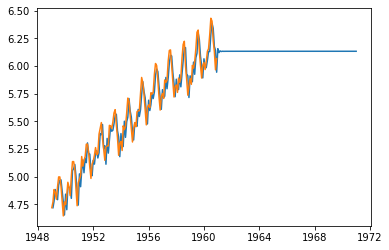

In [352]:
plt.plot(predictions)
plt.plot(passengers_log)

In [353]:
predictions

1949-02-01    4.718499
1949-03-01    4.776386
1949-04-01    4.883218
1949-05-01    4.824421
1949-06-01    4.791402
                ...   
1970-09-01    6.134126
1970-10-01    6.134126
1970-11-01    6.134126
1970-12-01    6.134126
1971-01-01    6.134126
Freq: MS, Name: predicted_mean, Length: 264, dtype: float64